In [ ]:

from google.colab import files 
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
# importing the libraries

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import itertools
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('SampleSuperstore.csv')
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Checking the shape of dataset

df1.shape

(9994, 13)

In [ ]:
# Five point summary of dataset

df1.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values are present in our dataset

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# Converting postal code to object datatype

df1['Postal Code'] = df1['Postal Code'].astype("object")

In [ ]:
# Taking the number of categories in each features

df_cat = df1.select_dtypes(object)
for i in df_cat.columns:
  print('\nColumn:',i)
  print('\nNumber of categories:',df1[i].value_counts().count())
  print(df1[i].value_counts())


Column: Ship Mode

Number of categories: 4
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Column: Segment

Number of categories: 3
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Column: Country

Number of categories: 1
United States    9994
Name: Country, dtype: int64

Column: City

Number of categories: 531
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Waterloo             1
Aberdeen             1
Rochester Hills      1
Keller               1
Atlantic City        1
Name: City, Length: 531, dtype: int64

Column: State

Number of categories: 49
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michiga

**Shipment Modes**

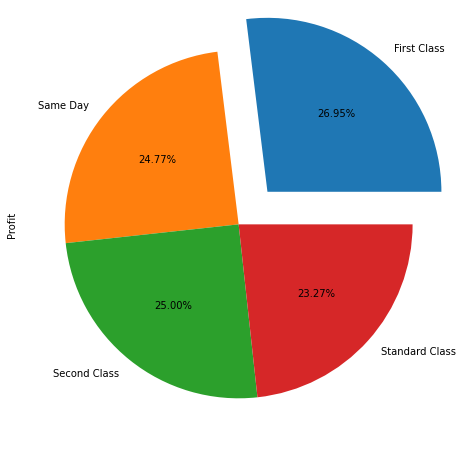

In [ ]:
plt.figure(figsize=(15,8))
df1.groupby('Ship Mode')['Profit'].mean().plot(kind='pie',autopct='%0.2f%%',explode=[0.25,0,0,0])
plt.show()

**Inference:**
Comparitively with other shipment modes, people tends to prefer First class shipment mode slightly more.

**State wise Sales Performance**

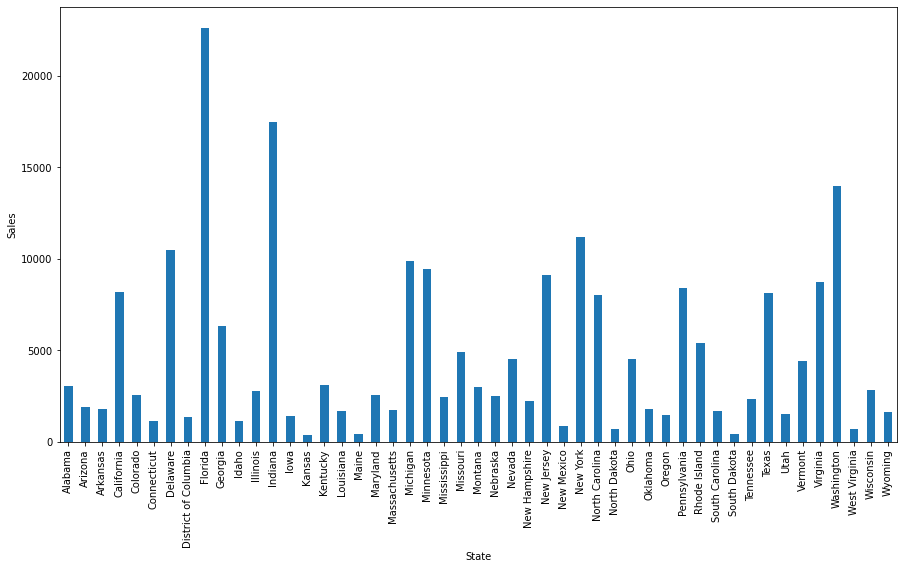

In [ ]:
plt.figure(figsize=(15,8))
df1.groupby('State')['Sales'].max().plot(kind='bar')
plt.ylabel('Sales')
plt.show()

**Inference:**

- The above barchart says that the Florida state is experiencing the best overall sales performance and the states like Kansas, Maine and South Dakota are performing a very bad sales performance.

**Sales Performance of Category-Subcategory Combination**

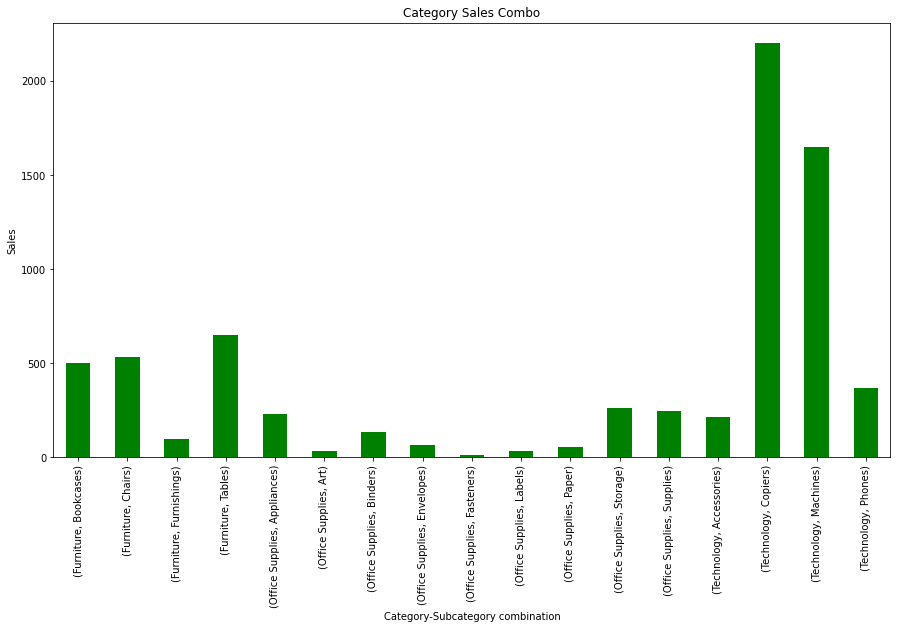

In [ ]:
plt.figure(figsize=(15,8))
df1.groupby(['Category','Sub-Category'])['Sales'].mean().plot(kind='bar',color='g')
plt.ylabel('Sales')
plt.xlabel('Category-Subcategory combination')
plt.title('Category Sales Combo')
plt.show()

**Inference:**

- From the above bar plot we can infer that in the category Technology, copiers is having the overall sales performance high.

- And also we inferred that Fasterners from the category Office supplies is having a bad sales performance while comparing with others.

**Region Wise Average Profit Distribution**

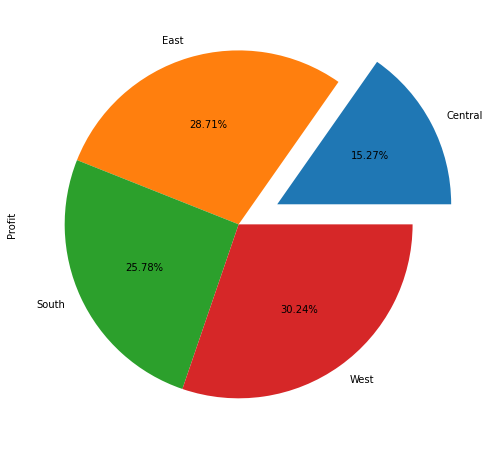

In [ ]:
plt.figure(figsize=(15,8))
df1.groupby('Region')['Profit'].mean().plot(kind='pie',autopct='%0.2f%%',explode=[0.25,0,0,0])
plt.show()

**Inference**

- From the pie plot we obtained above it is clear that when the store is giving a discount of 80%, the central region people tends to buy more and that is leading the profit of store too low.

- The average profit of central region is too low comparing with the other regions.

**Correlation Plot for the Numerical Features**

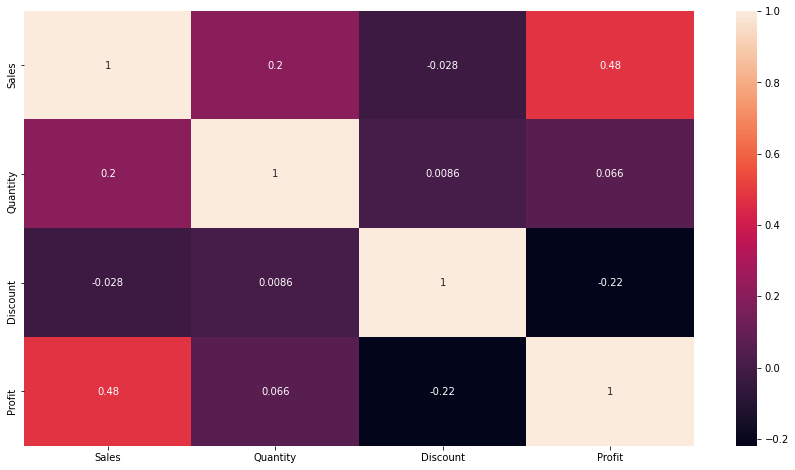

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

**Discounts impacting over sales and profit**

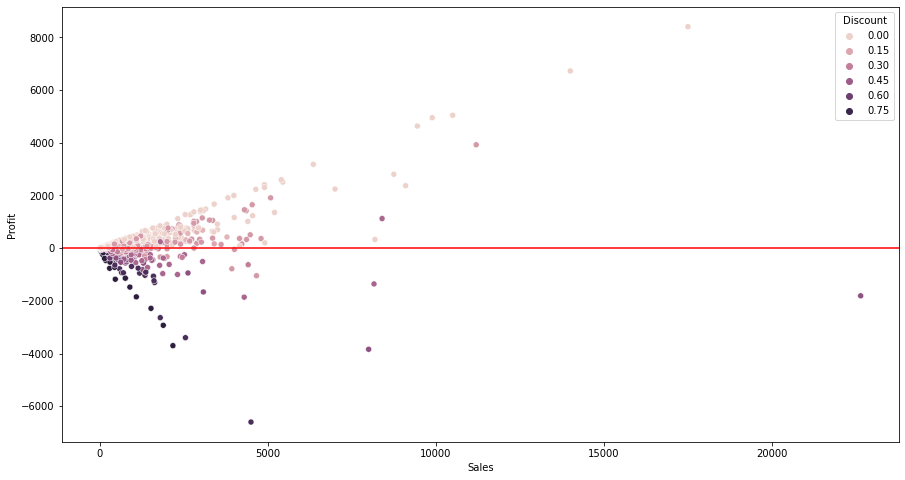

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(df1['Sales'],df1['Profit'],hue=df1['Discount'])
plt.axhline(0,0,color='r')
plt.show()

**Inference:**

- From the correlation heatmap we obtained, it is stating that the Sales features is a bit correlated with Profit.

- The second plot which is a scatter plot says that the store giving more discount is resulting in the profit loss 

- And also at the same time sales is happening but there is no profit in return when discount is increasing.

**Segment VS Discount**

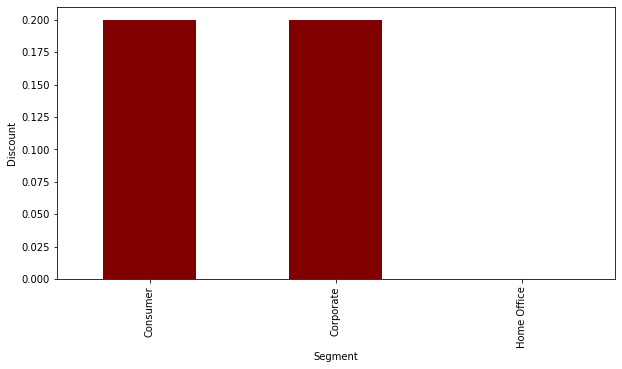

In [ ]:
plt.figure(figsize=(10,5))
df1.groupby('Segment')['Discount'].median().plot(kind='bar',color='maroon')
plt.ylabel('Discount')
plt.show()

**Inference:**

- The home office people tends to buy more with no discounts comparing with other segment people.

**Category wise Sales Performance over different ship modes**

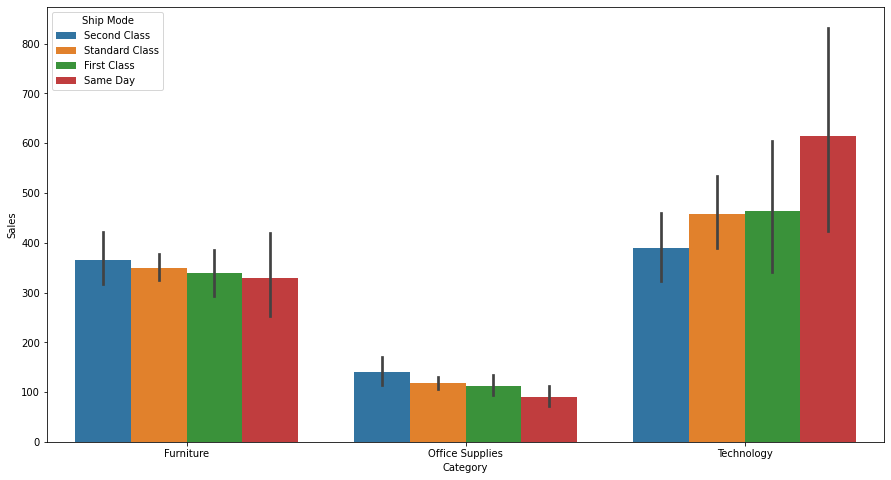

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Category', y ='Sales', data=df1, hue=df1['Ship Mode'])
plt.show()

**Inference:**

- From the multivariate analysis barplot we can infer that from the technology category, same day shipment mode is having more sales while comparing with other shipment modes.

# ***THANK YOU***